# Energy Surface for PCA

In [2]:
import matplotlib as mpl
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline 
mpl.rcParams['legend.fontsize'] = 10

In [3]:
xmin , xmax , ymin , ymax = -1 , 1 , -1 , 1
extent = [xmin , xmax , ymin , ymax ]

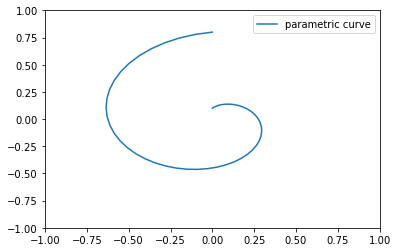

In [5]:
fig = plt.figure()

theta=np.linspace(0.0, 2*np.pi, num=50)
r=np.linspace(0.1, 0.8, num=50)

x=r*np.sin(theta)
y=r*np.cos(theta)

plt.plot(x, y, label = 'parametric curve')
plt.axis((xmin , xmax , ymin , ymax))
plt.legend()

plt.show()

In [6]:
data=np.transpose(np.array([x,y]))
estimator = PCA(n_components=1).fit(data)

In [7]:
ngrid=100

xx=np.linspace(-1,1,ngrid)
yy=np.linspace(-1,1,ngrid)
xv, yv = np.meshgrid(xx, yy)

ss=np.zeros(shape=(ngrid,ngrid))

for i in range(ngrid):
    for j in range(ngrid):
        inputs=np.array([xv[i,j],yv[i,j]]).reshape(1,-1)
        e = estimator.inverse_transform(estimator.transform(inputs)) - inputs
        ss[i,j] = np.linalg.norm(e,ord=2)

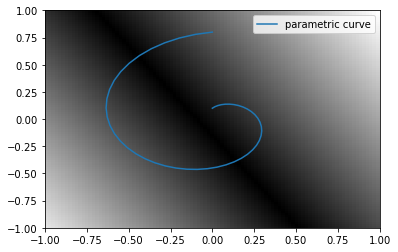

In [8]:
fig = plt.figure()
plotkwargs = {'cmap' : cm.gray}
plt.pcolor(xv, yv, ss, **plotkwargs)
plt.plot(x, y, label='parametric curve')
plt.legend()
plt.show()